# Artificial Neural Networks - Forward Propagation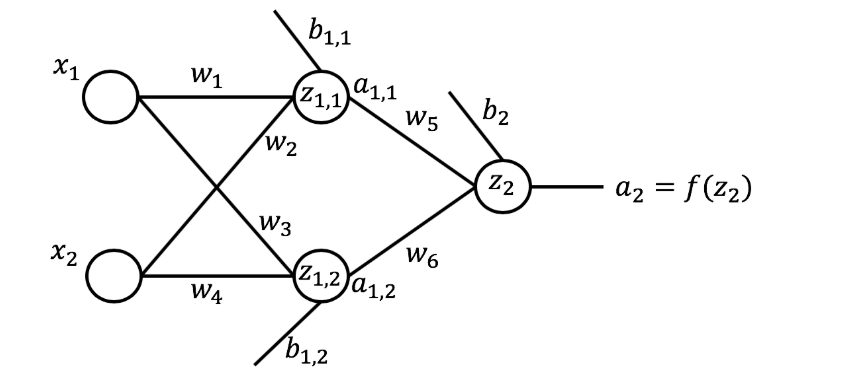

In [1]:

import numpy as np

# Get random 6 weights and 3 bias value
# we will get differnt random value everytime when we run this code as we have not set random seed
weights = np.around(np.random.uniform(size=6), decimals=2)
biases = np.around(np.random.uniform(size=3), decimals=2)

# Print the weights
print(weights)
print(biases)

# Input is initlizsed
x_1 = 0.5 # input 1
x_2 = 0.85 # input 2

# Print the input
print('x1 is {} and x2 is {}'.format(x_1, x_2))

# Calculate Weighted Sum

z_11 = x_1 * weights[0] + x_2 * weights[1] + biases[0]
print('The weighted sum of the inputs at the first node in the hidden layer is {}'.format(z_11))

z_12 = x_1 * weights[2] + x_2 * weights[3] + biases[1]
print('The weighted sum of the inputs at the second node in the hidden layer is {}'.format(np.around(z_12, decimals=4)))


# Apply Sigmoid activation function
# activation functions give neural networks non-linearity.
a_11 = 1.0 / (1.0 + np.exp(-z_11))
a_12 = 1.0 / (1.0 + np.exp(-z_12))
print('The activation of the first node in the hidden layer is {}'.format(np.around(a_11, decimals=4)))
print('The activation of the second node in the hidden layer is {}'.format(np.around(a_12, decimals=4)))

# Output neuron takes activations from hidden layer
z_2 = a_11 * weights[4] + a_12 * weights[5] + biases[2]
print('The weighted sum of the inputs at the node in the output layer is {}'.format(np.around(z_2, decimals=4)))

# Apply sigmoid activation function
a_2 = 1.0 / (1.0 + np.exp(-z_2))
print('The output of the network for x1 = 0.5 and x2 = 0.85 is {}'.format(np.around(a_2, decimals=4)))





[0.1  0.08 0.7  0.78 0.07 0.85]
[0.62 0.28 0.25]


# Build Neural Network

In [2]:
# Function to create a neural network with random weights/biases
# Inputs: num_inputs, num_hidden_layers, num_nodes_hidden (list), num_nodes_output
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):

    # Track number of neurons in the previous layer (starts as input layer size)
    num_nodes_previous = num_inputs

# Create empty dictionary
    network = {}

    # Loop through hidden layers and then the output layer
    for layer in range(num_hidden_layers + 1):
        # Decide if this is a hidden layer or the output layer, and set number of neurons
        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = num_nodes_output
        else:
            layer_name = 'layer_{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = num_nodes_hidden[layer]

        # # For each node, create random weights (one per previous-layer neuron) and a random bias
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }


        num_nodes_previous = num_nodes

    return network

# Create one small network

In [3]:
small_network =initialize_network(5, 3, [3,2,3],1)

# Create fumction for calculation weighted sum

In [4]:
def compute_weighted_sum(inputs, weights, bias):
    return np.sum(inputs * weights) + bias

In [5]:
# Createa random input for the network

from random import seed
import numpy as np

np.random.seed(12)
inputs = np.around(np.random.uniform(size=5), decimals=2)

print('The inputs to the network are {}'.format(inputs))

The inputs to the network are [0.15 0.74 0.26 0.53 0.01]


In [6]:
# Use the compute_weighted_sum function to compute
# the weighted sum at the first node in the first hidden layer.

node_weights = small_network['layer_1']['node_1']['weights']
node_bias = small_network['layer_1']['node_1']['bias']

weighted_sum = compute_weighted_sum(inputs, node_weights, node_bias)


# Create sigmoid activation function
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))

#Use the node_activation function to compute the output of the first node in the first hidden layer.
### type your answer here
node_output  = node_activation(compute_weighted_sum(inputs, node_weights, node_bias))
print('The output of the first node in the hidden layer is {}'.format(np.around(node_output[0], decimals=4)))



The output of the first node in the hidden layer is 0.7562


# Forward Propagation

In [8]:
def forward_propagate(network, inputs):

    layer_inputs = list(inputs) # start with the input layer as the input to the first hidden layer

    for layer in network:

        layer_data = network[layer]

        layer_outputs = []
        for layer_node in layer_data:

            node_data = layer_data[layer_node]

            # compute the weighted sum and the output of each node at the same time
            node_output = node_activation(compute_weighted_sum(layer_inputs, node_data['weights'], node_data['bias']))
            layer_outputs.append(np.around(node_output[0], decimals=4))

        if layer != 'output':
            print('The outputs of the nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layer_outputs))

        layer_inputs = layer_outputs # set the output of this layer to be the input to next layer

    network_predictions = layer_outputs
    return network_predictions

# Use the forward_propagate function to compute the prediction of our small network

In [9]:

predictions = forward_propagate(small_network, inputs)
print('The predicted value by the network for the given input is {}'.format(np.around(predictions[0], decimals=4)))


The outputs of the nodes in hidden layer number 1 is [np.float64(0.7562), np.float64(0.7604), np.float64(0.7836)]
The outputs of the nodes in hidden layer number 2 is [np.float64(0.805), np.float64(0.8313)]
The outputs of the nodes in hidden layer number 3 is [np.float64(0.7784), np.float64(0.7899), np.float64(0.8865)]
The predicted value by the network for the given input is 0.918


# Another Network

In [10]:
my_network = initialize_network(5, 3, [2, 3, 2], 3)
inputs = np.around(np.random.uniform(size=5), decimals=2)
predictions = forward_propagate(my_network, inputs)
print('The predicted values by the network for the given input are {}'.format(predictions))


The outputs of the nodes in hidden layer number 1 is [np.float64(0.8857), np.float64(0.8889)]
The outputs of the nodes in hidden layer number 2 is [np.float64(0.7822), np.float64(0.6965), np.float64(0.7411)]
The outputs of the nodes in hidden layer number 3 is [np.float64(0.868), np.float64(0.881)]
The predicted values by the network for the given input are [np.float64(0.8952), np.float64(0.8222), np.float64(0.8035)]


# Back Propagation

Backpropagation is the key algorithm used for training neural networks, allowing them to learn from data. It is based on the gradient descent optimization technique and works by iteratively adjusting the weights and biases of the network to minimize the error between the predicted and actual outputs.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset (truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # shape (2,4): each column is one training example
d = np.array([0, 1, 1, 0])  # XOR labels for the 4 examples (shape: (4,))  # (often reshaped to (1,4))

# Initialize random weights and biases for the network
def initialize_network_parameters():
    # Network hyperparameters / settings
    inputSize = 2      # Input features (x1, x2)
    hiddenSize = 2     # Neurons in hidden layer
    outputSize = 1     # Output neuron (binary output)
    lr = 0.1           # Learning rate
    epochs = 180000    # Number of training epochs

    # Initialize weights and biases randomly in [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1   # Input→Hidden weights, shape (2,2)
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1           # Hidden bias, shape (2,1)
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # Hidden→Output weights, shape (1,2)
    b2 = np.random.rand(outputSize, 1) * 2 - 1           # Output bias, shape (1,1)

    return w1, b1, w2, b2, lr, epochs

In [14]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1              # hidden layer pre-activation (weighted sum), shape (2,4)
    a1 = 1 / (1 + np.exp(-z1))           # hidden layer activation (sigmoid), shape (2,4)

    z2 = np.dot(w2, a1) + b2             # output layer pre-activation, shape (1,4)
    a2 = 1 / (1 + np.exp(-z2))           # output layer activation (sigmoid), shape (1,4)

    # Error + backpropagation (delta terms)
    error = d - a2                        # prediction error (target - output), shape should be (1,4)
    delta2 = error * (a2 * (1 - a2))      # output layer delta (error term)

    # Backprop to hidden layer
    delta1 = np.dot(w2.T, delta2) * (a1 * (1 - a1))   # hidden layer delta

    # Update weights and biases
    w2 += lr * np.dot(delta2, a1.T)       # update hidden→output weights
    b2 += lr * np.sum(delta2, axis=1, keepdims=True)  # update output bias

    w1 += lr * np.dot(delta1, X.T)        # update input→hidden weights
    b1 += lr * np.sum(delta1, axis=1, keepdims=True)  # update hidden biases

    if (epoch + 1) % 10000 == 0:
        print("Epoch: %d, Average error: %0.05f" % (epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.06924
Epoch: 19999, Average error: 0.03276
Epoch: 29999, Average error: 0.02425
Epoch: 39999, Average error: 0.02005
Epoch: 49999, Average error: 0.01744
Epoch: 59999, Average error: 0.01563
Epoch: 69999, Average error: 0.01428
Epoch: 79999, Average error: 0.01323
Epoch: 89999, Average error: 0.01237
Epoch: 99999, Average error: 0.01166
Epoch: 109999, Average error: 0.01106
Epoch: 119999, Average error: 0.01054
Epoch: 129999, Average error: 0.01009
Epoch: 139999, Average error: 0.00969
Epoch: 149999, Average error: 0.00933
Epoch: 159999, Average error: 0.00901
Epoch: 169999, Average error: 0.00872
Epoch: 179999, Average error: 0.00845


# Testing the network

In [15]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.0092915  0.991992   0.99193456 0.00845249]]
Ground truth [0 1 1 0]
Error after training: [[-0.00929153  0.00800802  0.00806546 -0.00845252]]
Average error: 0.00845


# Plot the graph

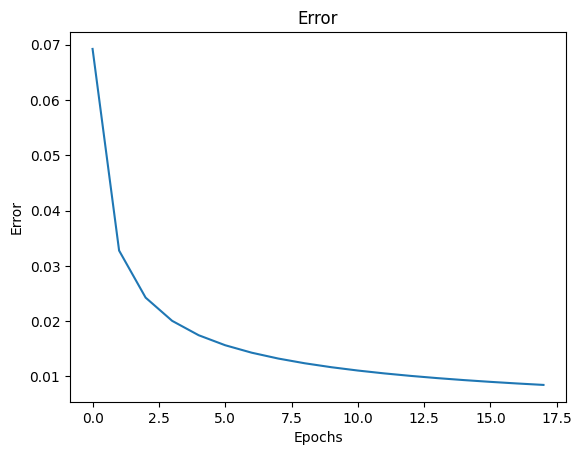

In [16]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# backpropagation for AND problem

Final output after training: [[0.0014 0.0236 0.0214 0.9661]]
Ground truth: [[0 0 0 1]]
Predicted class (threshold 0.5): [[0 0 0 1]]


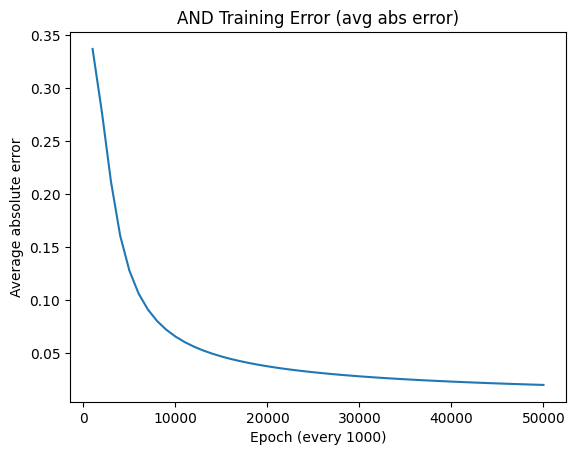

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# AND dataset (truth table)
# -----------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]]).T                 # shape (2,4)
d = np.array([[0, 0, 0, 1]])             # shape (1,4)  AND labels

# -----------------------------
# Sigmoid + derivative
# -----------------------------
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)   # a = sigmoid(z)

# -----------------------------
# Initialize parameters (2→2→1 like XOR)
# -----------------------------
np.random.seed(12)
inputSize, hiddenSize, outputSize = 2, 2, 1
lr = 0.1
epochs = 50000

w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1   # (2,2)
b1 = np.random.rand(hiddenSize, 1) * 2 - 1           # (2,1)
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # (1,2)
b2 = np.random.rand(outputSize, 1) * 2 - 1           # (1,1)

# -----------------------------
# Training (backprop)
# -----------------------------
error_list = []
checkpoint_every = 1000

for epoch in range(epochs):
    # Forward pass
    z1 = w1 @ X + b1          # (2,4)
    a1 = sigmoid(z1)          # (2,4)
    z2 = w2 @ a1 + b2         # (1,4)
    a2 = sigmoid(z2)          # (1,4)

    # Error + deltas (MSE-style demo)
    error = d - a2                            # (1,4)
    delta2 = error * sigmoid_derivative(a2)   # (1,4)
    delta1 = (w2.T @ delta2) * sigmoid_derivative(a1)  # (2,4)

    # Gradients (average over 4 samples)
    m = X.shape[1]
    w2 += lr * (delta2 @ a1.T) / m
    b2 += lr * np.sum(delta2, axis=1, keepdims=True) / m
    w1 += lr * (delta1 @ X.T) / m
    b1 += lr * np.sum(delta1, axis=1, keepdims=True) / m

    # Track error (average absolute error) for graph
    if (epoch + 1) % checkpoint_every == 0:
        error_list.append(np.mean(np.abs(error)))

# -----------------------------
# Test / print final outputs
# -----------------------------
z1 = w1 @ X + b1
a1 = sigmoid(z1)
z2 = w2 @ a1 + b2
a2 = sigmoid(z2)

print("Final output after training:", np.round(a2, 4))
print("Ground truth:", d)
print("Predicted class (threshold 0.5):", (a2 >= 0.5).astype(int))

# -----------------------------
# Error graph
# -----------------------------
x_axis = np.arange(checkpoint_every, epochs + 1, checkpoint_every)
plt.plot(x_axis, error_list)
plt.title("AND Training Error (avg abs error)")
plt.xlabel(f"Epoch (every {checkpoint_every})")
plt.ylabel("Average absolute error")
plt.show()

# decrease the learning rate to 0.01 and increase the number of epochs to 1000000 and check the error for XOR gate

Epoch 10000, Avg abs error: 0.496992
Epoch 20000, Avg abs error: 0.494143
Epoch 30000, Avg abs error: 0.487873
Epoch 40000, Avg abs error: 0.473228
Epoch 50000, Avg abs error: 0.440382
Epoch 60000, Avg abs error: 0.380994
Epoch 70000, Avg abs error: 0.307803
Epoch 80000, Avg abs error: 0.245140
Epoch 90000, Avg abs error: 0.200291
Epoch 100000, Avg abs error: 0.169182
Epoch 110000, Avg abs error: 0.147041
Epoch 120000, Avg abs error: 0.130673
Epoch 130000, Avg abs error: 0.118131
Epoch 140000, Avg abs error: 0.108221
Epoch 150000, Avg abs error: 0.100188
Epoch 160000, Avg abs error: 0.093535
Epoch 170000, Avg abs error: 0.087928
Epoch 180000, Avg abs error: 0.083130
Epoch 190000, Avg abs error: 0.078972
Epoch 200000, Avg abs error: 0.075329
Epoch 210000, Avg abs error: 0.072106
Epoch 220000, Avg abs error: 0.069232
Epoch 230000, Avg abs error: 0.066650
Epoch 240000, Avg abs error: 0.064316
Epoch 250000, Avg abs error: 0.062193
Epoch 260000, Avg abs error: 0.060252
Epoch 270000, Avg abs

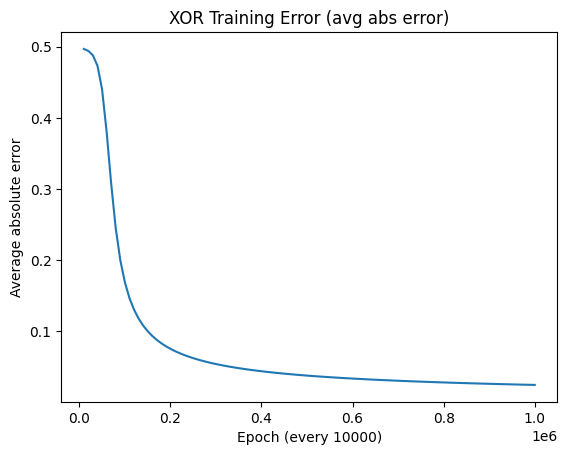

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# XOR dataset
# -----------------------------
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]]).T                 # (2,4)
d = np.array([[0, 1, 1, 0]])             # (1,4)  <-- important shape

# -----------------------------
# Sigmoid + derivative
# -----------------------------
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

# -----------------------------
# Hyperparameters (your request)
# -----------------------------
np.random.seed(12)
lr = 0.01
epochs = 1_000_000

# -----------------------------
# Initialize parameters (2→2→1)
# -----------------------------
inputSize, hiddenSize, outputSize = 2, 2, 1
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1   # (2,2)
b1 = np.random.rand(hiddenSize, 1) * 2 - 1           # (2,1)
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1  # (1,2)
b2 = np.random.rand(outputSize, 1) * 2 - 1           # (1,1)

# -----------------------------
# Train (Backprop)
# -----------------------------
error_list = []
checkpoint_every = 10_000  # store/print error every 10k epochs (100 points total)

for epoch in range(epochs):
    # Forward
    z1 = w1 @ X + b1
    a1 = sigmoid(z1)
    z2 = w2 @ a1 + b2
    a2 = sigmoid(z2)

    # Backprop deltas (demo-style)
    error = d - a2
    delta2 = error * sigmoid_derivative(a2)
    delta1 = (w2.T @ delta2) * sigmoid_derivative(a1)

    # Update (average over samples)
    m = X.shape[1]
    w2 += lr * (delta2 @ a1.T) / m
    b2 += lr * np.sum(delta2, axis=1, keepdims=True) / m
    w1 += lr * (delta1 @ X.T) / m
    b1 += lr * np.sum(delta1, axis=1, keepdims=True) / m

    # Track error for graph
    if (epoch + 1) % checkpoint_every == 0:
        avg_abs_err = np.mean(np.abs(error))
        error_list.append(avg_abs_err)
        print(f"Epoch {epoch+1}, Avg abs error: {avg_abs_err:.6f}")

# -----------------------------
# Final check
# -----------------------------
z1 = w1 @ X + b1
a1 = sigmoid(z1)
z2 = w2 @ a1 + b2
a2 = sigmoid(z2)

print("\nFinal output after training:", np.round(a2, 4))
print("Ground truth:", d)
print("Predicted class (threshold 0.5):", (a2 >= 0.5).astype(int))

# -----------------------------
# Plot error
# -----------------------------
x_axis = np.arange(checkpoint_every, epochs + 1, checkpoint_every)
plt.plot(x_axis, error_list)
plt.title("XOR Training Error (avg abs error)")
plt.xlabel(f"Epoch (every {checkpoint_every})")
plt.ylabel("Average absolute error")
plt.show()

# Activation Functions and Vanishing Gradients

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function (maps real numbers to (0,1))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Derivative of sigmoid with respect to z
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# ReLU activation function (returns 0 for negative inputs)
def relu(z):
    return np.maximum(0, z)
# Derivative of ReLU (1 if z>0, else 0)
def relu_derivative(z):
    return np.where(z > 0, 1, 0)

# Generate 400 evenly spaced values between -10 and 10
z = np.linspace(-10, 10, 400)

# Compute gradients (derivatives) of sigmoid and ReLU

sigmoid_grad = sigmoid_derivative(z)
relu_grad = relu_derivative(z)

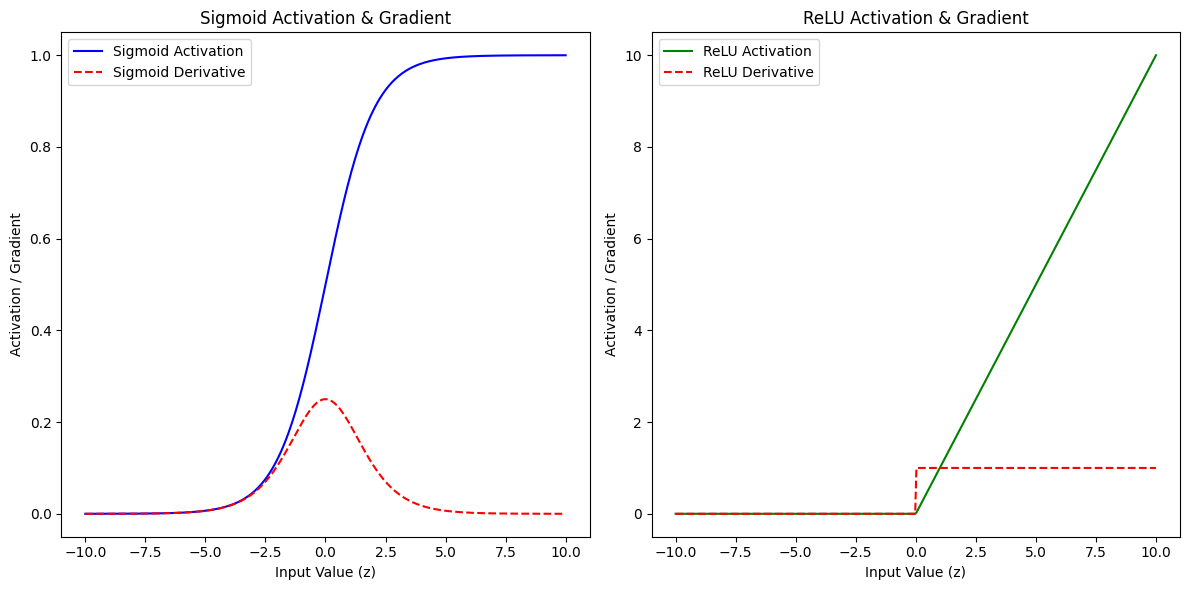

In [21]:
# Visualize
# Plot the activation functions
plt.figure(figsize=(12, 6))

# Plot Sigmoid and its derivative
plt.subplot(1, 2, 1)
plt.plot(z, sigmoid(z), label='Sigmoid Activation', color='b')
plt.plot(z, sigmoid_grad, label="Sigmoid Derivative", color='r', linestyle='--')
plt.title('Sigmoid Activation & Gradient')
plt.xlabel('Input Value (z)')
plt.ylabel('Activation / Gradient')
plt.legend()

# Plot ReLU and its derivative
plt.subplot(1, 2, 2)
plt.plot(z, relu(z), label='ReLU Activation', color='g')
plt.plot(z, relu_grad, label="ReLU Derivative", color='r', linestyle='--')
plt.title('ReLU Activation & Gradient')
plt.xlabel('Input Value (z)')
plt.ylabel('Activation / Gradient')
plt.legend()

plt.tight_layout()
plt.show()

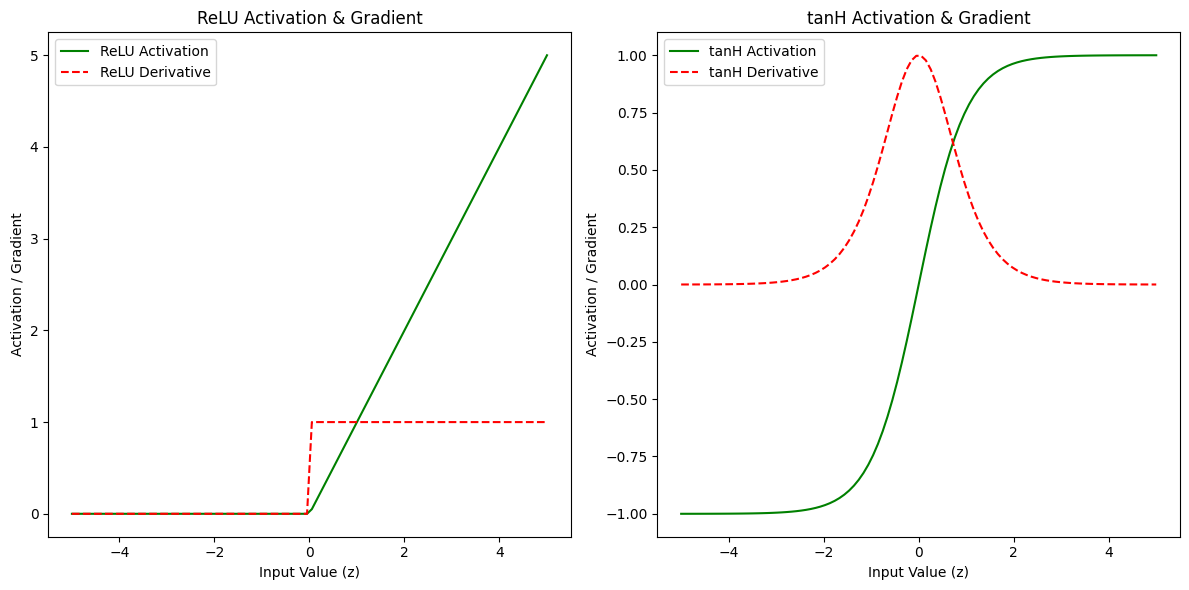

In [22]:
# Hyperbolic Tangent function

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z) ** 2

# Generate a range of input values
z = np.linspace(-5, 5, 100)

# Get the Relu and tanH gradient values
tanh_grad = tanh_derivative(z)
relu_grad = relu_derivative(z)


# Plot the activation functions
plt.figure(figsize=(12, 6))

# Plot Relu and its derivative
plt.subplot(1, 2, 1)
plt.plot(z, relu(z), label='ReLU Activation', color='g')
plt.plot(z, relu_grad, label="ReLU Derivative", color='r', linestyle='--')
plt.title('ReLU Activation & Gradient')
plt.xlabel('Input Value (z)')
plt.ylabel('Activation / Gradient')
plt.legend()


# Plot tanH and its derivative
plt.subplot(1, 2, 2)
plt.plot(z, tanh(z), label='tanH Activation', color='g')
plt.plot(z, tanh_grad, label="tanH Derivative", color='r', linestyle='--')
plt.title('tanH Activation & Gradient')
plt.xlabel('Input Value (z)')
plt.ylabel('Activation / Gradient')
plt.legend()

plt.tight_layout()
plt.show()